# BUSINESS CASE : To Explore football skills and cluster football players based on their attributes and to explore the data and attempt all the below asked questions in a step by step manner:
     ● Prepare a rank ordered list of top 10 countries with most players. Which countries are producing the most footballers that play at this level?
     ● Plot the distribution of overall rating vs. age of players. Interpret what is the age after which a player stops improving?
     ● Which type of offensive players tends to get paid the most: the striker, the right-winger, or the left-winger? 


## Domain Analysis

In [1]:
# Import the required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Loading the data
fifa=pd.read_csv("players_20.csv")

In [3]:
fifa.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3


In [4]:
fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Columns: 104 entries, sofifa_id to rb
dtypes: float64(16), int64(45), object(43)
memory usage: 14.5+ MB


In [5]:
fifa.describe()

,sofifa_id,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,...,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
count,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,1.827800e+04,18278.000000,18278.000000,18278.000000,...,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000
mean,219738.864482,25.283291,181.362184,75.276343,66.244994,71.546887,2.484038e+06,9456.942773,1.103184,2.944250,...,48.383357,58.528778,46.848889,47.640333,45.606631,16.572765,16.354853,16.212934,16.368038,16.709924
std,27960.200461,4.656964,6.756961,7.047744,6.949953,6.139669,5.585481e+06,21351.714095,0.378861,0.664656,...,15.708099,11.880840,20.091287,21.585641,21.217734,17.738069,16.996925,16.613665,17.136497,18.038125
min,768.000000,16.000000,156.000000,50.000000,48.000000,49.000000,0.000000e+00,0.000000,1.000000,1.000000,...,7.000000,12.000000,1.000000,5.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,204445.500000,22.000000,177.000000,70.000000,62.000000,67.000000,3.250000e+05,1000.000000,1.000000,3.000000,...,39.000000,51.000000,29.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,226165.000000,25.000000,181.000000,75.000000,66.000000,71.000000,7.000000e+05,3000.000000,1.000000,3.000000,...,49.000000,60.000000,52.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,240795.750000,29.000000,186.000000,80.000000,71.000000,75.000000,2.100000e+06,8000.000000,1.000000,3.000000,...,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,252905.000000,42.000000,205.000000,110.000000,94.000000,95.000000,1.055000e+08,565000.000000,5.000000,5.000000,...,92.000000,96.000000,94.000000,92.000000,90.000000,90.000000,92.000000,93.000000,91.000000,92.000000


In [6]:
#Wage_eur and value_eur are having a zero value as a minimum. check players with 0 value in value_eur and wage_eur.

In [7]:
fifa.describe(include="O")

,player_url,short_name,long_name,dob,nationality,club,player_positions,preferred_foot,work_rate,body_type,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
count,18278,18278,18278,18278,18278,18278,18278,18278,18278,18278,...,16242,16242,16242,16242,16242,16242,16242,16242,16242,16242
unique,18278,17354,18218,6142,162,698,643,2,9,10,...,98,98,98,98,98,96,110,110,110,96
top,https://sofifa.com/player/158023/lionel-messi/...,J. Rodríguez,Liam Kelly,1992-02-29,England,FC Barcelona,CB,Right,Medium/Medium,Normal,...,59+2,59+2,59+2,59+2,59+2,61+2,63+2,63+2,63+2,61+2
freq,1,11,3,113,1667,33,2322,13960,9875,10750,...,682,636,636,636,682,667,621,621,621,667


In [9]:
fifa.shape

(18278, 104)

In [10]:
for col in fifa.columns:
    print(col)

sofifa_id
player_url
short_name
long_name
age
dob
height_cm
weight_kg
nationality
club
overall
potential
value_eur
wage_eur
player_positions
preferred_foot
international_reputation
weak_foot
skill_moves
work_rate
body_type
real_face
release_clause_eur
player_tags
team_position
team_jersey_number
loaned_from
joined
contract_valid_until
nation_position
nation_jersey_number
pace
shooting
passing
dribbling
defending
physic
gk_diving
gk_handling
gk_kicking
gk_reflexes
gk_speed
gk_positioning
player_traits
attacking_crossing
attacking_finishing
attacking_heading_accuracy
attacking_short_passing
attacking_volleys
skill_dribbling
skill_curve
skill_fk_accuracy
skill_long_passing
skill_ball_control
movement_acceleration
movement_sprint_speed
movement_agility
movement_reactions
movement_balance
power_shot_power
power_jumping
power_stamina
power_strength
power_long_shots
mentality_aggression
mentality_interceptions
mentality_positioning
mentality_vision
mentality_penalties
mentality_composure
defe

### Data Analysis and Cleaning

In [11]:
#Work Rate Column
fifa['work_rate'].value_counts()

Medium/Medium    9875
High/Medium      3216
Medium/High      1718
High/High         986
Medium/Low        886
High/Low          684
Low/Medium        461
Low/High          417
Low/Low            35
Name: work_rate, dtype: int64

In [12]:
#Preferred Foot column
fifa['preferred_foot'].value_counts()

Right    13960
Left      4318
Name: preferred_foot, dtype: int64

In [13]:
#Body Type Column
fifa['body_type'].value_counts()

Normal                 10750
Lean                    6505
Stocky                  1016
Messi                      1
C. Ronaldo                 1
Neymar                     1
PLAYER_BODY_TYPE_25        1
Courtois                   1
Shaqiri                    1
Akinfenwa                  1
Name: body_type, dtype: int64

In [14]:
fifa['body_type'][fifa['body_type'] == 'Messi'] = 'Lean'
fifa['body_type'][fifa['body_type'] == 'C. Ronaldo'] = 'Normal'
fifa['body_type'][fifa['body_type'] == 'Neymar'] = 'Lean'
fifa['body_type'][fifa['body_type'] == 'Courtois'] = 'Lean'

#PLAYER_BODY_TYPE_25 is Normal body type
fifa['body_type'][fifa['body_type'] == 'PLAYER_BODY_TYPE_25'] = 'Normal'
fifa['body_type'][fifa['body_type'] == 'Shaqiri'] = 'Stocky'
fifa['body_type'][fifa['body_type'] == 'Akinfenwa'] = 'Stocky'
fifa['body_type'].fillna('Normal', inplace = True)

In [15]:
fifa['body_type'].value_counts()

Normal    10752
Lean       6508
Stocky     1018
Name: body_type, dtype: int64

In [ ]:
#Skill Columns

#Function to convert skill rating at each position.
def skillConverter(val):
    if type(val) == str:
        s1 = val[0:2]
        s2 = val[-1]
        val = int(s1) + int(s2)
        return val
    else:
        return val

skill_columns = ['ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam',
       'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm',
       'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb']

for col in skill_columns:
    fifa[col] = fifa[col].apply(skillConverter)
    fifa[col].fillna(0.0, inplace = True)

In [16]:
pd.set_option('display.max_columns', 70)
fifa.head()


,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,...,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,94,94,95500000,565000,"RW, CF, ST",Left,5,4,4,Medium/Low,Lean,Yes,195800000.0,"#Dribbler, #Distance Shooter, #Crosser, #FK Sp...",RW,10.0,NaN,2004-07-01,2021.0,NaN,NaN,87.0,92.0,92.0,96.0,...,96,33,37,26,6,11,15,14,8,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,92+2,87+2,87+2,87+2,92+2,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,93,93,58500000,405000,"ST, LW",Right,5,4,5,High/Low,Normal,Yes,96500000.0,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",LW,7.0,NaN,2018-07-10,2022.0,LS,7.0,90.0,93.0,82.0,89.0,...,95,28,32,24,7,11,15,14,11,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,"LW, CAM",Right,5,5,5,High/Medium,Lean,Yes,195200000.0,"#Speedster, #Dribbler, #Playmaker , #Crosser,...",CAM,10.0,NaN,2017-08-03,2022.0,LW,10.0,91.0,85.0,87.0,95.0,...,94,27,26,29,9,9,15,15,11,84+3,84+3,84+3,90+3,89+3,89+3,89+3,90+3,90+3,90+3,90+3,89+3,82+3,82+3,82+3,89+3,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,GK,Right,3,3,1,Medium/Medium,Normal,Yes,164700000.0,NaN,GK,13.0,NaN,2014-07-16,2023.0,GK,1.0,NaN,NaN,NaN,NaN,...,68,27,12,18,87,92,78,90,89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,91,91,90000000,470000,"LW, CF",Right,4,4,4,High/Medium,Normal,Yes,184500000.0,"#Speedster, #Dribbler, #Acrobat",LW,7.0,NaN,2019-07-01,2024.0,LF,10.0,91.0,83.0,86.0,94.0,...,91,34,27,22,11,12,6,8,8,83+3,83+3,83+3,89+3,88+3,88+3,88+3,89+3,89+3,89+3,89+3,89+3,83+3,83+3,83+3,89+3,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3


## Exploratory Data Analysis

In [ ]:
#Univariate Analysis

import sweetviz as sv #importing sweetviz library
my_report = sv.analyze(fifa) #syntax to use sweetviz
my_report.show_html() #Default arguments will generate to "SWEETVIZ_REPORT.html

#### Question : Prepare a rank ordered list of top 10 countries with most players. Which countries are producing the most footballers that play at this level?

In [17]:
#Analyzing Nationality
fifa["nationality"].value_counts()

England                1667
Germany                1216
Spain                  1035
France                  984
Argentina               886
                       ... 
Liberia                   1
São Tomé & Príncipe       1
Puerto Rico               1
Bahrain                   1
Indonesia                 1
Name: nationality, Length: 162, dtype: int64

In [18]:
#Display 10 countries with most players in ascending order
fifa["nationality"].value_counts()[0:10]  

England        1667
Germany        1216
Spain          1035
France          984
Argentina       886
Brazil          824
Italy           732
Colombia        591
Japan           453
Netherlands     416
Name: nationality, dtype: int64

In [19]:
list(fifa["nationality"].value_counts()[0:10].keys())

['England',
 'Germany',
 'Spain',
 'France',
 'Argentina',
 'Brazil',
 'Italy',
 'Colombia',
 'Japan',
 'Netherlands']

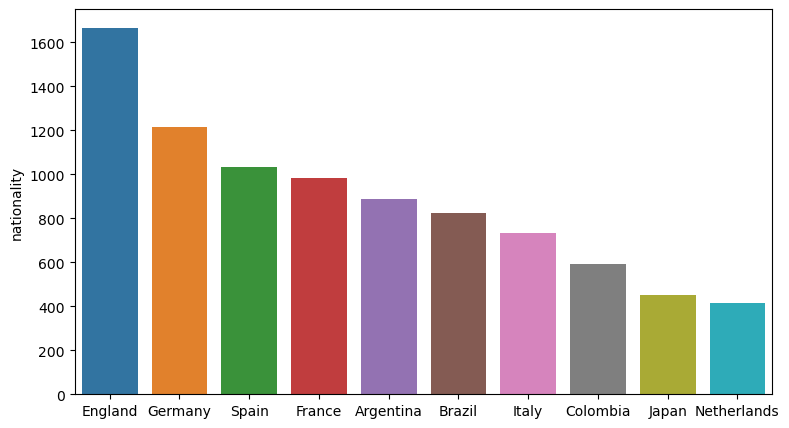

In [20]:
plt.figure(figsize=(9,5))
sns.barplot(x = list(fifa["nationality"].value_counts()[0:10].keys()), y=fifa["nationality"].value_counts()[0:10], data=fifa)
plt.show()

The countries with most players are shown in the grave above. Here the data : 
* England        1667
* Germany        1216
* Spain          1035
* France          984
* Argentina       886
* Brazil          824
* Italy           732
* Colombia        591
* Japan           453
* Netherlands     416

#### Question : Plot the distribution of overall rating vs. age of players. Interpret what is the age after which a player stops improving ?

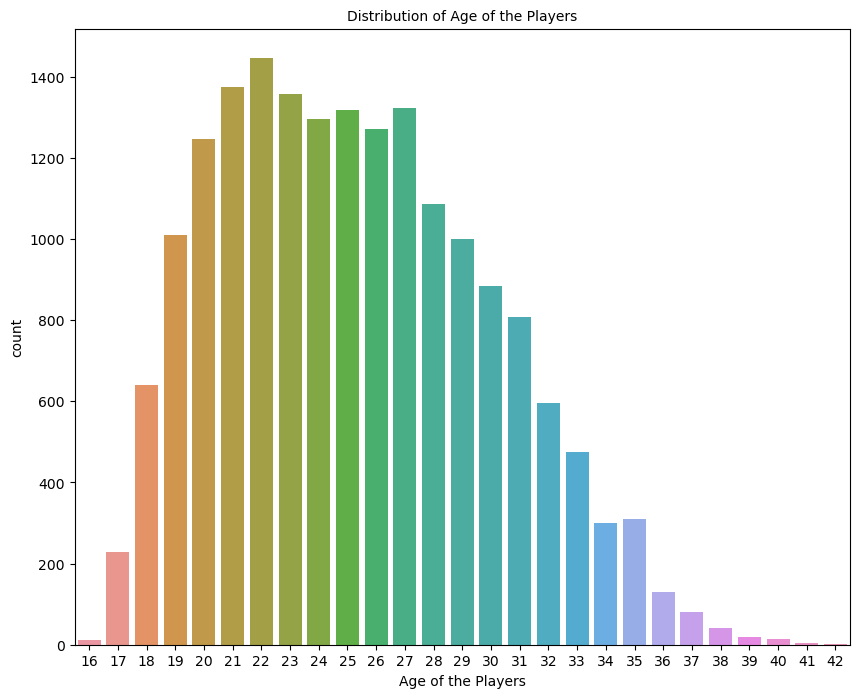

In [21]:
#Distribution of age for each Players
plt.figure(figsize=(10,8))
ax = sns.countplot(x=fifa['age'])
ax.set_xlabel(xlabel = 'Age of the Players', fontsize = 10)
ax.set_title(label = 'Distribution of Age of the Players', fontsize = 10)
plt.show()

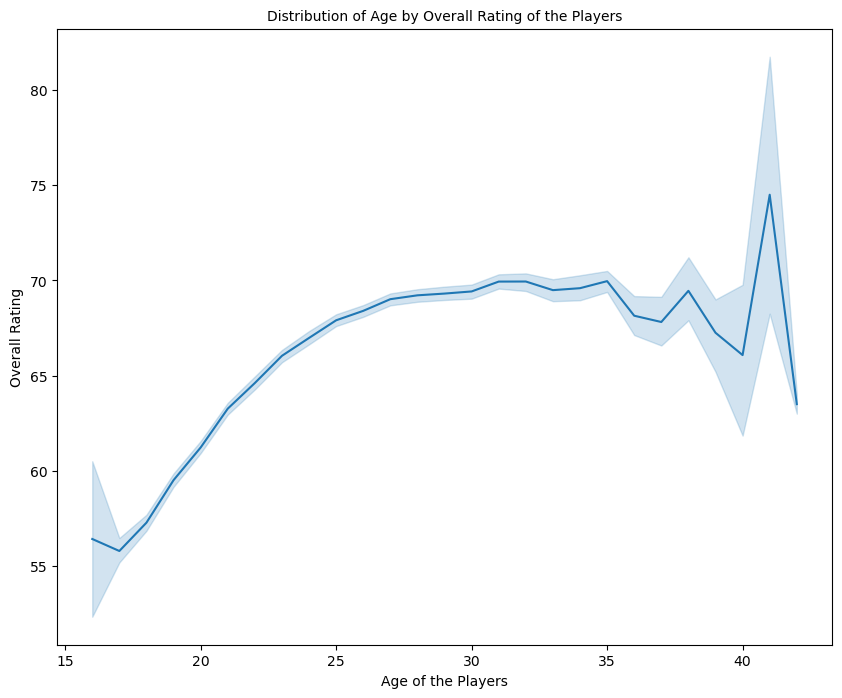

In [22]:
plt.figure(figsize=(10,8))
ax = sns.lineplot(data=fifa, x="age", y="overall")
ax.set_xlabel(xlabel = 'Age of the Players', fontsize = 10)
ax.set_ylabel(ylabel = 'Overall Rating', fontsize = 10)
ax.set_title(label = 'Distribution of Age by Overall Rating of the Players', fontsize = 10)
plt.show()

##### According to the graphe above, we can see clearly that the players stop improving their football skills after the after of 35 years old !

#### Question : which type of offensive players tends to get paid the most: the striker, the right-winger, or the left-winger.

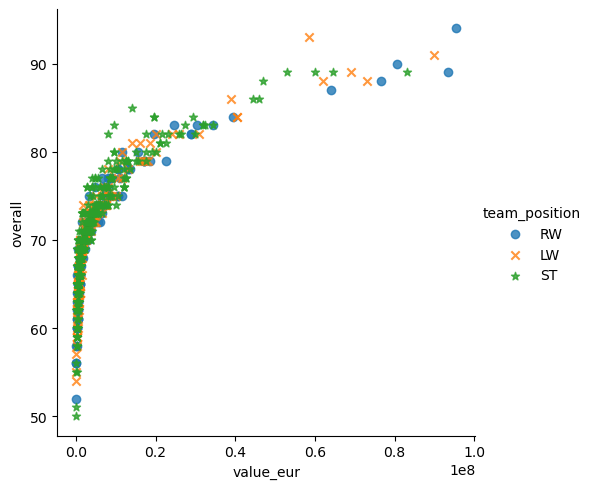

In [23]:
sns.lmplot(x='value_eur', y='overall',markers=['o', 'x', '*'], hue='team_position', 
           data=fifa.loc[fifa['team_position'].isin(['ST', 'RW', 'LW'])], 
           fit_reg=False)

#### According to the graphe above, we see that the Right Winger are the most paid. 

## Feature Selection

In [ ]:
#Step 1 Dropping the unwanted variables

In [24]:
for col in fifa.columns:
    print(col)

sofifa_id
player_url
short_name
long_name
age
dob
height_cm
weight_kg
nationality
club
overall
potential
value_eur
wage_eur
player_positions
preferred_foot
international_reputation
weak_foot
skill_moves
work_rate
body_type
real_face
release_clause_eur
player_tags
team_position
team_jersey_number
loaned_from
joined
contract_valid_until
nation_position
nation_jersey_number
pace
shooting
passing
dribbling
defending
physic
gk_diving
gk_handling
gk_kicking
gk_reflexes
gk_speed
gk_positioning
player_traits
attacking_crossing
attacking_finishing
attacking_heading_accuracy
attacking_short_passing
attacking_volleys
skill_dribbling
skill_curve
skill_fk_accuracy
skill_long_passing
skill_ball_control
movement_acceleration
movement_sprint_speed
movement_agility
movement_reactions
movement_balance
power_shot_power
power_jumping
power_stamina
power_strength
power_long_shots
mentality_aggression
mentality_interceptions
mentality_positioning
mentality_vision
mentality_penalties
mentality_composure
defe

In [25]:
fifa = fifa[['short_name','age', 'height_cm', 'weight_kg', 'overall', 'potential',
       'value_eur', 'wage_eur', 'international_reputation', 'weak_foot',
       'skill_moves', 'release_clause_eur', 'team_jersey_number',
       'contract_valid_until', 'nation_jersey_number', 'pace', 'shooting',
       'passing', 'dribbling', 'defending', 'physic', 'gk_diving',
       'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed',
       'gk_positioning', 'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_marking', 'defending_standing_tackle',
       'defending_sliding_tackle', 'goalkeeping_diving',
       'goalkeeping_handling', 'goalkeeping_kicking',
       'goalkeeping_positioning', 'goalkeeping_reflexes']]

In [26]:
fifa.head()

,short_name,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,skill_moves,release_clause_eur,team_jersey_number,contract_valid_until,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,L. Messi,32,170,72,94,94,95500000,565000,5,4,4,195800000.0,10.0,2021.0,NaN,87.0,92.0,92.0,96.0,39.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8
1,Cristiano Ronaldo,34,187,83,93,93,58500000,405000,5,4,5,96500000.0,7.0,2022.0,7.0,90.0,93.0,82.0,89.0,35.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11
2,Neymar Jr,27,175,68,92,92,105500000,290000,5,5,5,195200000.0,10.0,2022.0,10.0,91.0,85.0,87.0,95.0,32.0,58.0,NaN,NaN,NaN,NaN,NaN,NaN,87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11
3,J. Oblak,26,188,87,91,93,77500000,125000,3,3,1,164700000.0,13.0,2023.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,89.0,52.0,90.0,13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89
4,E. Hazard,28,175,74,91,91,90000000,470000,4,4,4,184500000.0,7.0,2024.0,10.0,91.0,83.0,86.0,94.0,35.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,81,84,61,89,83,95,83,79,83,94,94,88,95,90,94,82,56,84,63,80,54,41,87,89,88,91,34,27,22,11,12,6,8,8


In [27]:
fifa = fifa[fifa.overall > 86] # extracting players with overall above 86
fifa

,short_name,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,skill_moves,release_clause_eur,team_jersey_number,contract_valid_until,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,L. Messi,32,170,72,94,94,95500000,565000,5,4,4,195800000.0,10.0,2021.0,NaN,87.0,92.0,92.0,96.0,39.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8
1,Cristiano Ronaldo,34,187,83,93,93,58500000,405000,5,4,5,96500000.0,7.0,2022.0,7.0,90.0,93.0,82.0,89.0,35.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11
2,Neymar Jr,27,175,68,92,92,105500000,290000,5,5,5,195200000.0,10.0,2022.0,10.0,91.0,85.0,87.0,95.0,32.0,58.0,NaN,NaN,NaN,NaN,NaN,NaN,87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11
3,J. Oblak,26,188,87,91,93,77500000,125000,3,3,1,164700000.0,13.0,2023.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,89.0,52.0,90.0,13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89
4,E. Hazard,28,175,74,91,91,90000000,470000,4,4,4,184500000.0,7.0,2024.0,10.0,91.0,83.0,86.0,94.0,35.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,81,84,61,89,83,95,83,79,83,94,94,88,95,90,94,82,56,84,63,80,54,41,87,89,88,91,34,27,22,11,12,6,8,8
5,K. De Bruyne,28,181,70,91,91,90000000,370000,4,5,4,166500000.0,17.0,2023.0,7.0,76.0,86.0,92.0,86.0,61.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,93,82,55,92,82,86,85,83,91,91,77,76,78,91,76,91,63,89,74,90,76,61,88,94,79,91,68,58,51,15,13,5,10,13
6,M. ter Stegen,27,187,85,90,93,67500000,250000,3,4,1,143400000.0,1.0,2022.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,88.0,85.0,88.0,90.0,45.0,88.0,18,14,11,61,14,21,18,12,63,30,38,50,37,86,43,66,79,35,78,10,43,22,11,70,25,70,25,13,10,88,85,88,88,90
7,V. van Dijk,27,193,92,90,91,78000000,200000,3,3,2,150200000.0,4.0,2023.0,4.0,77.0,60.0,70.0,71.0,90.0,86.0,NaN,NaN,NaN,NaN,NaN,NaN,53,52,86,78,45,70,60,70,81,76,74,79,61,88,53,81,90,75,92,64,82,89,47,65,62,89,91,92,85,13,10,13,11,11
8,L. Modrić,33,172,66,90,90,45000000,340000,4,4,4,92300000.0,10.0,2020.0,NaN,74.0,76.0,89.0,89.0,72.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,86,72,55,92,76,87,85,78,88,92,77,71,92,89,93,79,68,85,58,82,62,82,79,91,82,92,68,76,71,13,9,7,14,9
9,M. Salah,27,175,71,90,90,80500000,240000,3,3,4,148900000.0,11.0,2023.0,10.0,93.0,86.0,81.0,89.0,45.0,74.0,NaN,NaN,NaN,NaN,NaN,NaN,79,90,59,84,79,89,83,69,75,89,94,92,91,92,88,80,69,85,73,84,63,55,92,84,77,91,38,43,41,14,14,9,11,14


In [29]:
pd.set_option('display.max_rows', 70)
fifa.isnull().sum()

short_name                     0
age                            0
height_cm                      0
weight_kg                      0
overall                        0
potential                      0
value_eur                      0
wage_eur                       0
international_reputation       0
weak_foot                      0
skill_moves                    0
release_clause_eur             0
team_jersey_number             0
contract_valid_until           0
nation_jersey_number          21
pace                          10
shooting                      10
passing                       10
dribbling                     10
defending                     10
physic                        10
gk_diving                     45
gk_handling                   45
gk_kicking                    45
gk_reflexes                   45
gk_speed                      45
gk_positioning                45
attacking_crossing             0
attacking_finishing            0
attacking_heading_accuracy     0
attacking_

In [30]:
fifa.mean() #gives the mean of each column

age                           2.916364e+01
height_cm                     1.823636e+02
weight_kg                     7.838182e+01
overall                       8.854545e+01
potential                     8.932727e+01
value_eur                     5.601818e+07
wage_eur                      2.326364e+05
international_reputation      3.509091e+00
weak_foot                     3.454545e+00
skill_moves                   3.000000e+00
release_clause_eur            1.070327e+08
team_jersey_number            9.963636e+00
contract_valid_until          2.021836e+03
nation_jersey_number          8.529412e+00
pace                          7.548889e+01
shooting                      7.466667e+01
passing                       7.884444e+01
dribbling                     8.197778e+01
defending                     6.133333e+01
physic                        7.377778e+01
gk_diving                     8.750000e+01
gk_handling                   8.510000e+01
gk_kicking                    8.000000e+01
gk_reflexes

In [32]:
#Replace null values with mean
fifa = fifa.fillna(fifa.mean())

In [33]:
fifa.isnull().sum()

short_name                    0
age                           0
height_cm                     0
weight_kg                     0
overall                       0
potential                     0
value_eur                     0
wage_eur                      0
international_reputation      0
weak_foot                     0
skill_moves                   0
release_clause_eur            0
team_jersey_number            0
contract_valid_until          0
nation_jersey_number          0
pace                          0
shooting                      0
passing                       0
dribbling                     0
defending                     0
physic                        0
gk_diving                     0
gk_handling                   0
gk_kicking                    0
gk_reflexes                   0
gk_speed                      0
gk_positioning                0
attacking_crossing            0
attacking_finishing           0
attacking_heading_accuracy    0
attacking_short_passing       0
attackin

In [34]:
names = fifa.short_name.tolist() # saving names for later
names[0:5]

['L. Messi', 'Cristiano Ronaldo', 'Neymar Jr', 'J. Oblak', 'E. Hazard']

In [35]:
fifa = fifa.drop(['short_name'], axis = 1) # drop the short_name column 

In [36]:
fifa.head()

,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,skill_moves,release_clause_eur,team_jersey_number,contract_valid_until,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,32,170,72,94,94,95500000,565000,5,4,4,195800000.0,10.0,2021.0,8.529412,87.000000,92.000000,92.000000,96.000000,39.000000,66.000000,87.5,85.1,80.0,89.2,54.4,86.4,88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8
1,34,187,83,93,93,58500000,405000,5,4,5,96500000.0,7.0,2022.0,7.000000,90.000000,93.000000,82.000000,89.000000,35.000000,78.000000,87.5,85.1,80.0,89.2,54.4,86.4,84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11
2,27,175,68,92,92,105500000,290000,5,5,5,195200000.0,10.0,2022.0,10.000000,91.000000,85.000000,87.000000,95.000000,32.000000,58.000000,87.5,85.1,80.0,89.2,54.4,86.4,87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11
3,26,188,87,91,93,77500000,125000,3,3,1,164700000.0,13.0,2023.0,1.000000,75.488889,74.666667,78.844444,81.977778,61.333333,73.777778,87.0,92.0,78.0,89.0,52.0,90.0,13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89
4,28,175,74,91,91,90000000,470000,4,4,4,184500000.0,7.0,2024.0,10.000000,91.000000,83.000000,86.000000,94.000000,35.000000,66.000000,87.5,85.1,80.0,89.2,54.4,86.4,81,84,61,89,83,95,83,79,83,94,94,88,95,90,94,82,56,84,63,80,54,41,87,89,88,91,34,27,22,11,12,6,8,8


## Model Creation

In [57]:
# Scaling the data with MinMaxScaler
from sklearn import preprocessing

x = fifa.values # numpy array
scaler = preprocessing.MinMaxScaler()
x_scaled = scaler.fit_transform(x)
X_norm = pd.DataFrame(x_scaled, columns= fifa.columns)  #transform the 1D array into 2D Array

In [58]:
x_scaled

array([[0.85714286, 0.19444444, 0.35135135, ..., 0.14285714, 0.11627907,
        0.05617978],
       [1.        , 0.66666667, 0.64864865, ..., 0.14285714, 0.11627907,
        0.08988764],
       [0.5       , 0.33333333, 0.24324324, ..., 0.14285714, 0.12790698,
        0.08988764],
       ...,
       [0.57142857, 0.30555556, 0.2972973 , ..., 0.05494505, 0.05813953,
        0.11235955],
       [0.85714286, 0.61111111, 0.56756757, ..., 0.8021978 , 0.90697674,
        0.97752809],
       [0.57142857, 0.        , 0.        , ..., 0.13186813, 0.05813953,
        0.07865169]])

In [59]:
X_norm

,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,skill_moves,release_clause_eur,team_jersey_number,contract_valid_until,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,0.857143,0.194444,0.351351,1.000000,0.875,0.885057,1.000000,1.000000,0.75,0.75,1.000000,0.300000,0.25,0.358543,0.833333,0.984615,1.000000,1.000000,0.120690,0.452381,0.5,0.372727,0.48,0.44,0.522222,0.550,0.939024,1.000000,0.731707,1.000000,0.974684,1.000000,1.000000,1.000000,1.000000,1.0000,0.913793,0.781818,0.949153,0.933333,1.000000,0.795455,0.584615,0.661538,0.517857,1.000000,0.367647,0.358025,0.988235,1.000000,0.810127,1.000000,0.227848,0.329268,0.219512,0.034483,0.089888,0.142857,0.116279,0.056180
1,1.000000,0.666667,0.648649,0.857143,0.750,0.459770,0.648352,1.000000,0.75,1.00,0.385520,0.200000,0.50,0.285714,0.888889,1.000000,0.736842,0.805556,0.051724,0.738095,0.5,0.372727,0.48,0.44,0.522222,0.550,0.890244,0.988235,0.963415,0.854839,0.962025,0.908046,0.853659,0.785714,0.741379,0.9500,0.879310,0.909091,0.847458,1.000000,0.600000,1.000000,1.000000,0.815385,0.696429,0.988095,0.588235,0.222222,1.000000,0.812500,0.936709,0.967742,0.164557,0.268293,0.195122,0.045977,0.089888,0.142857,0.116279,0.089888
2,0.500000,0.333333,0.243243,0.714286,0.625,1.000000,0.395604,1.000000,1.00,1.00,0.996287,0.300000,0.50,0.428571,0.907407,0.876923,0.868421,0.972222,0.000000,0.261905,0.5,0.372727,0.48,0.44,0.522222,0.550,0.926829,0.905882,0.634146,0.919355,0.962025,0.988506,0.939024,0.916667,0.810345,0.9875,0.965517,0.872727,1.000000,0.733333,0.816667,0.659091,0.476923,0.753846,0.178571,0.880952,0.411765,0.308642,0.905882,0.937500,1.000000,0.935484,0.151899,0.195122,0.256098,0.068966,0.067416,0.142857,0.127907,0.089888
3,0.428571,0.694444,0.756757,0.571429,0.750,0.678161,0.032967,0.333333,0.50,0.00,0.807550,0.400000,0.75,0.000000,0.620165,0.717949,0.653801,0.610494,0.505747,0.637566,0.4,1.000000,0.40,0.40,0.388889,1.000,0.024390,0.011765,0.060976,0.209677,0.025316,0.022989,0.024390,0.047619,0.103448,0.1750,0.086207,0.345455,0.508475,0.466667,0.233333,0.181818,0.738462,0.138462,0.696429,0.023810,0.161765,0.098765,0.011765,0.546875,0.000000,0.096774,0.151899,0.024390,0.121951,0.965517,1.000000,0.835165,1.000000,0.966292
4,0.571429,0.333333,0.405405,0.571429,0.500,0.821839,0.791209,0.666667,0.75,0.75,0.930074,0.200000,1.00,0.428571,0.907407,0.846154,0.842105,0.944444,0.051724,0.452381,0.5,0.372727,0.48,0.44,0.522222,0.550,0.853659,0.870588,0.621951,0.951613,0.911392,0.977011,0.878049,0.821429,0.844828,0.9750,0.965517,0.854545,0.983051,0.600000,0.983333,0.704545,0.400000,0.800000,0.428571,0.833333,0.455882,0.370370,0.905882,0.921875,0.974684,0.838710,0.240506,0.207317,0.170732,0.091954,0.101124,0.043956,0.046512,0.056180
5,0.571429,0.500000,0.297297,0.571429,0.500,0.821839,0.571429,0.666667,1.00,0.75,0.818688,0.533333,0.75,0.285714,0.629630,0.892308,1.000000,0.722222,0.500000,0.738095,0.5,0.372727,0.48,0.44,0.522222,0.550,1.000000,0.847059,0.548780,1.000000,0.898734,0.873563,0.902439,0.869048,0.982759,0.9375,0.672414,0.636364,0.694915,0.666667,0.683333,0.909091,0.507692,0.876923,0.625000,0.952381,0.779412,0.617284,0.917647,1.000000,0.860759,0.838710,0.670886,0.585366,0.524390,0.137931,0.112360,0.

# Hyper Tuning Parameter

Use PCA to reduce 60 columns into 2

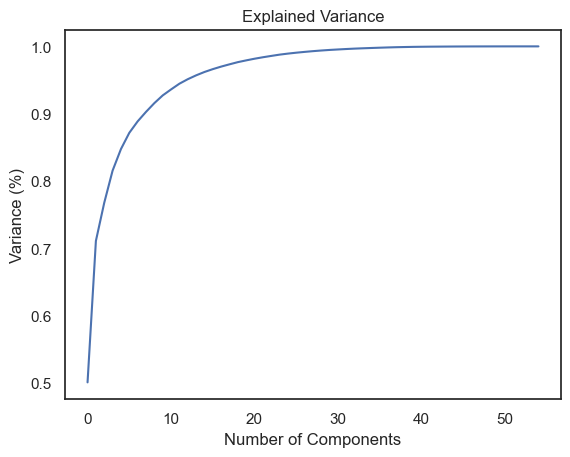

In [60]:
## getting the optimal number of pca
from sklearn.decomposition import PCA
pca = PCA()
pca.fit_transform(X_norm)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))#CUMULATIVE SUM PLOT
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Explained Variance')
plt.show()

From the diagram above, it can be seen that 2 principal components explain almost 90% of the variance in data and 5 principal components explain around 95% of the variance in data.

So, instead of giving all the columns as input, we’d only feed these 4 principal components of the data to the machine learning algorithm and we’d obtain a similar result.

In [86]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2) # 2D PCA for the plot
reduced = pd.DataFrame(pca.fit_transform(X_norm))
reduced

,0,1
0,-1.482137,-1.287998
1,-1.180190,-0.894344
2,-1.335542,-1.460300
3,2.974839,-0.789651
4,-1.207091,-1.249757
5,-1.220700,-0.316176
6,2.841079,-0.643662
7,-0.057094,1.237996
8,-1.124420,0.114656
9,-1.043005,-0.757538


Perform K-Means clustering

In [87]:
from sklearn.cluster import KMeans

# specify the number of clusters
kmeans = KMeans(n_clusters=5)

# fit the input data
kmeans = kmeans.fit(reduced)

# get the cluster labels
labels = kmeans.predict(reduced)

# centroid values
centroid = kmeans.cluster_centers_

# cluster values
clusters = kmeans.labels_.tolist()

Make a new data frame by adding players' names and their cluster

In [88]:
reduced['cluster'] = clusters
reduced['name'] = names
reduced.columns = ['x', 'y' ,'cluster', 'name']
reduced.head()

,x,y,cluster,name
0,-1.482137,-1.287998,3,L. Messi
1,-1.180190,-0.894344,3,Cristiano Ronaldo
2,-1.335542,-1.460300,3,Neymar Jr
3,2.974839,-0.789651,0,J. Oblak
4,-1.207091,-1.249757,3,E. Hazard


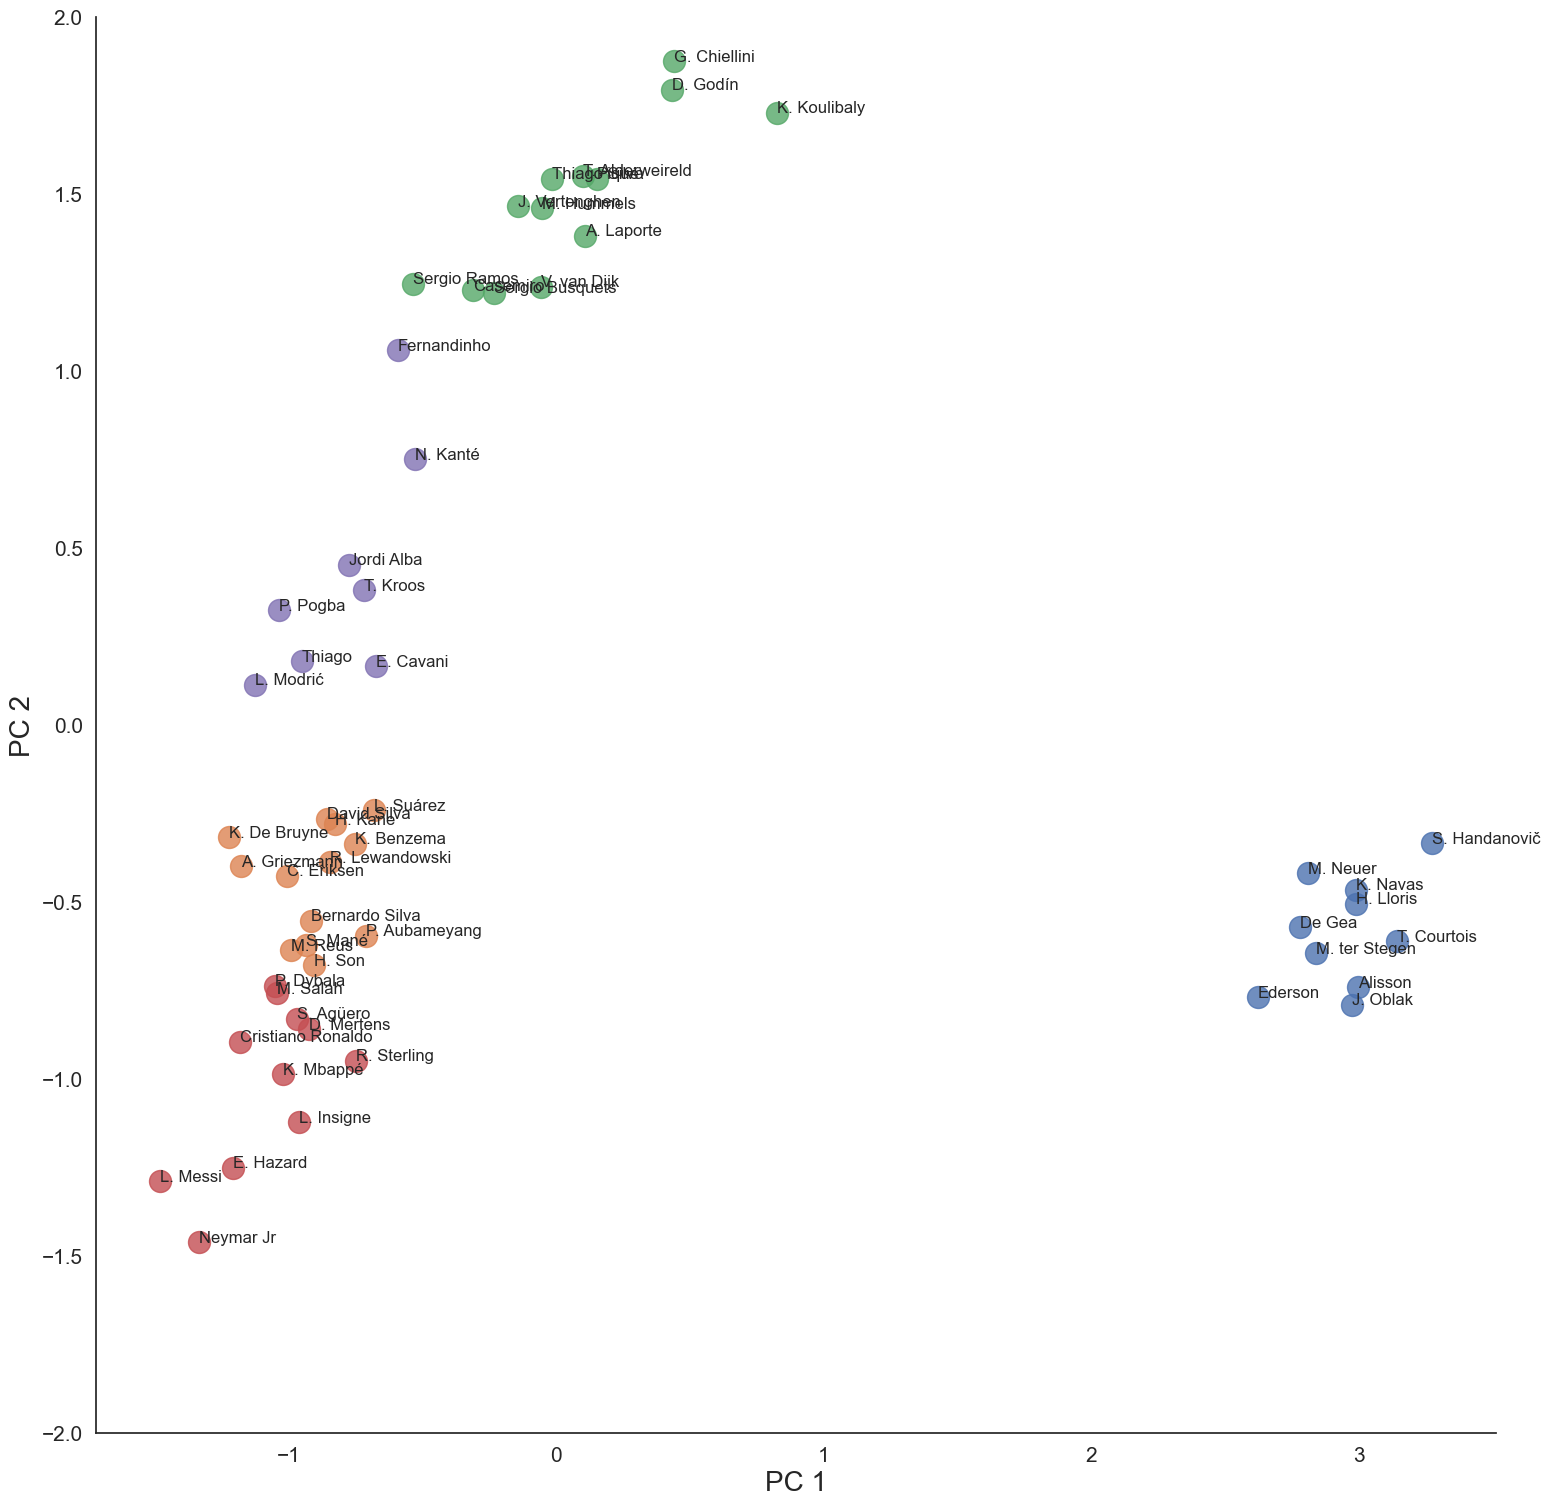

In [89]:
sns.set(style="white")

ax = sns.lmplot(x="x", y="y", hue='cluster', data = reduced, legend=False, height=15,
                   fit_reg=False,  scatter_kws={"s": 250})

texts = []
for x, y, s in zip(reduced.x, reduced.y, reduced.name):
    texts.append(plt.text(x, y, s))

ax.set(ylim=(-2, 2))
plt.tick_params(labelsize=15)
plt.xlabel("PC 1", fontsize = 20)
plt.ylabel("PC 2", fontsize = 20)

plt.show()

Evaluation metrics

In [90]:
#  Model Evalution
label=kmeans.labels_
print(label)


from sklearn.metrics import silhouette_score
dl=['name']
score=silhouette_score(reduced.drop(dl, axis=1),label)
score #K=

[3 3 3 0 3 1 0 2 4 3 3 2 1 0 0 4 2 3 2 1 1 2 1 3 4 0 3 1 0 2 0 0 0 1 4 2 4
 1 1 1 2 1 2 1 4 2 1 2 3 2 2 4 4 0 3]


0.8210589677405813

# Conclusion

After trying a range number of PCA and Clusters, we found that the best combinaison is 2 PCA and 5 clusters. They give us a score of 82%. 
In the graph below, we can see that goalkeepers are grouped on the right, defenders, midfielders, strikers and both right and left wingers all of each one are in a separate group. 
The silhouette score is more than 82% which mean that we have a good score and the machine learning can predicted well the position of the players based on its performance. 

# Report on Challenges faced

On this project there were several challenges:
 - The database is heavy with information, it was difficult to see all the columns and understand what it is.
 - This project took us a lot of time to research the application of K-means combined with PCA.
 - Reading the graph regarding the number of PCAs and the number of clusters was easy, but when we apply the values given by the Elbow method and Variance Graph, the silhouette score decreases considerably. We had to try manually until we got the right score.
 - This question "Plot the distribution of overall rating vs. age of players. Interpret what is the age after which a player stops improving?"  is simple but it was difficult to answer because the graph we obtain shows us that it has erroneous data. I see that it is impossible that a player's performance can increase over the age of 40.